In [ ]:
import pandas as pd
import numpy as np
import torch
from torch import nn
import torch.optim as optim
import zipfile
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

In [ ]:
header = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label", "diff"]
len(header)

43

In [ ]:
data_train = pd.read_csv("/content/drive/MyDrive/NSL-KDD/KDDTrain+.txt", names = header)
data_train.drop_duplicates(keep='first')
data_test = pd.read_csv("/content/drive/MyDrive/NSL-KDD/KDDTest+.txt", names = header)
data_test.drop_duplicates(keep='first')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,diff
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,5,10,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [ ]:
data_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,diff
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [ ]:
data = pd.DataFrame()

data = pd.concat([data_train, data_test])

data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,diff
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.0,0.0,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,5,10,0.0,0.0,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.0,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
final_data = pd.DataFrame()
final_data = pd.concat([data[data['label']=='normal'][0:10000],
                      data[data['label']=='neptune'][0:10000]], ignore_index = True)
final_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,diff
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,http,SF,287,2251,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,7,0.0,0.0,0.0,0.0,1.00,0.00,0.43,8,219,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,tcp,http,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,108,13,0.0,0.0,1.0,1.0,0.12,0.06,0.00,255,11,0.04,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,19
19996,0,tcp,uucp_path,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,262,7,1.0,1.0,0.0,0.0,0.03,0.06,0.00,255,10,0.04,0.08,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
19997,0,tcp,netstat,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,253,1,0.0,0.0,1.0,1.0,0.00,0.07,0.00,255,1,0.00,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,20
19998,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,3,1.0,1.0,0.0,0.0,0.02,0.07,0.00,255,16,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


In [ ]:
encodings = dict()
for c in final_data.columns:
  if final_data[c].dtype == "object":
    encodings[c] = LabelEncoder()
    final_data[c] = encodings[c].fit_transform(final_data[c])

In [ ]:
final_data.corr()['label'].sort_values()

dst_host_srv_serror_rate      -0.836751
srv_serror_rate               -0.833146
serror_rate                   -0.831990
dst_host_serror_rate          -0.831965
count                         -0.738484
dst_host_count                -0.548809
service                       -0.309622
dst_host_srv_rerror_rate      -0.207780
rerror_rate                   -0.205836
dst_host_rerror_rate          -0.203855
srv_rerror_rate               -0.203596
diff_srv_rate                 -0.187779
dst_host_diff_srv_rate        -0.126373
land                           0.007071
num_failed_logins              0.016976
num_shells                     0.020004
num_compromised                0.020508
num_root                       0.021130
num_file_creations             0.024123
su_attempted                   0.025407
root_shell                     0.033185
dst_bytes                      0.041669
num_access_files               0.047488
src_bytes                      0.048570
hot                            0.069308


In [ ]:
final_data = final_data[['label','same_srv_rate','flag','dst_host_same_srv_rate','dst_host_srv_count','logged_in']]

In [ ]:
final_data

,label,same_srv_rate,flag,dst_host_same_srv_rate,dst_host_srv_count,logged_in
0,1,1.00,8,0.17,25,0
1,1,0.08,8,0.00,1,0
2,1,1.00,8,1.00,255,1
3,1,1.00,8,1.00,255,1
4,1,1.00,8,1.00,219,1
...,...,...,...,...,...,...
19995,0,0.12,1,0.04,11,0
19996,0,0.03,4,0.04,10,0
19997,0,0.00,1,0.00,1,0
19998,0,0.02,4,0.06,16,0


In [ ]:
final_data = StandardScaler().fit_transform(final_data)

In [ ]:
final_data

array([[ 1.        ,  1.01843155,  0.99344944, -0.59807717, -0.69446186,
        -0.74147617],
       [ 1.        , -0.99724503,  0.99344944, -0.98240194, -0.91267154,
        -0.74147617],
       [ 1.        ,  1.01843155,  0.99344944,  1.27833201,  1.39671426,
         1.34866102],
       ...,
       [-1.        , -1.17252126, -1.89508476, -0.98240194, -0.91267154,
        -0.74147617],
       [-1.        , -1.1287022 , -0.65714153, -0.8467579 , -0.77629049,
        -0.74147617],
       [-1.        , -1.10679267, -0.65714153, -0.8467579 , -0.78538256,
        -0.74147617]])

In [ ]:
final_data = np.asarray(final_data).astype('float32')

In [ ]:
tensor = torch.from_numpy(final_data)

In [ ]:
class Generator(nn.Module):
    def __init__(self, latent_dim, layers, output_activation=None):
        """A generator for mapping a latent space to a sample space.
        Args: 
            layers (List[int]): A list of layer widths including output width
            output_activation: torch activation function or None
        """
        super(Generator, self).__init__()
        self.latent_dim = latent_dim #скрытое измерение ("вектор шума")
        self.output_activation = output_activation #функция активации факела 
        self._init_layers(layers)

    def _init_layers(self, layers):
        """Инициализация слоев и сохранения их как self.module_list."""
        self.module_list = nn.ModuleList()
        last_layer = self.latent_dim
        for index, width in enumerate(layers):
            self.module_list.append(nn.Linear(last_layer, width))
            last_layer = width
            if index + 1 != len(layers):
                self.module_list.append(nn.LeakyReLU())
        else:
            if self.output_activation is not None:
                self.module_list.append(self.output_activation())
        
    def forward(self, input_tensor):
        """Прямой проход; сопоставление скрытых векторов с образцами."""
        intermediate = input_tensor
        for layer in self.module_list:
            intermediate = layer(intermediate)
        return intermediate

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, input_dim, layers):
        """A discriminator for discerning real from generated samples.
        params:
            input_dim (int): width of the input
            layers (List[int]): A list of layer widths including output width
        Output activation is Sigmoid.
        """
        """Дискриминатор для различения реальных и сгенерированных выборок."""
        super(Discriminator, self).__init__()
        self.input_dim = input_dim #ширина ввода
        self._init_layers(layers)

    def _init_layers(self, layers):
        """Инициализация слоев и сохранения их как self.module_list."""
        self.module_list = nn.ModuleList()
        last_layer = self.input_dim
        for index, width in enumerate(layers):
            self.module_list.append(nn.Linear(last_layer, width)) 
            last_layer = width
            if index + 1 != len(layers):
                self.module_list.append(nn.LeakyReLU())
        else:
            self.module_list.append(nn.Sigmoid())

    def forward(self, input_tensor):
        """Прямой проход; сопоставления образцов,для того чтобы убедиться, что они реальны [0, 1]."""
        intermediate = input_tensor
        for layer in self.module_list:
            intermediate = layer(intermediate)
        return intermediate

In [ ]:
class VanillaGAN():
    def __init__(self, generator, discriminator, noise_fn, data_fn,
                 batch_size=32, device='cpu', lr_d=1e-3, lr_g=2e-4):
        """Класс VanillaGAN для удержания и обучения генератора и дискриминатора
        Args:
            generator: a Ganerator network
            discriminator: A Discriminator network
            noise_fn: function f(num: int) -> pytorch tensor, (latent vectors)
            data_fn: function f(num: int) -> pytorch tensor, (real samples)
            batch_size: training batch size
            device: cpu or CUDA
            lr_d: learning rate for the discriminator
            lr_g: learning rate for the generator
        """
        self.generator = generator #сеть генератора
        self.generator = self.generator.to(device)
        self.discriminator = discriminator #сеть дискриминатора
        self.discriminator = self.discriminator.to(device)
        self.noise_fn = noise_fn #function f(num: int) -> pytorch tensor, (latent vectors)
        self.data_fn = data_fn #function f(num: int) -> pytorch tensor, (real samples)
        self.batch_size = batch_size
        self.device = device #cpu or CUDA
        self.criterion = nn.BCELoss()
        self.optim_d = optim.Adam(discriminator.parameters(),
                                  lr=lr_d, betas=(0.5, 0.999))
        self.optim_g = optim.Adam(generator.parameters(),
                                  lr=lr_g, betas=(0.5, 0.999))
        self.target_ones = torch.ones((batch_size, 6)).to(device)
        self.target_zeros = torch.zeros((batch_size, 6)).to(device)

    def generate_samples(self, latent_vec=None, num=None):
        """Sample from the generator.
        Args:
            latent_vec: A pytorch latent vector or None
            num: The number of samples to generate if latent_vec is None
        If latent_vec and num are None then us self.batch_size random latent
        vectors.
        """
        num = self.batch_size if num is None else num
        latent_vec = self.noise_fn(num) if latent_vec is None else latent_vec
        with torch.no_grad():
            samples = self.generator(latent_vec)
        return samples

    def train_step_generator(self):
        """Тренировка генератора на один шаг, а после возвращения потерь."""
        self.generator.zero_grad() #очищение градиента

        latent_vec = self.noise_fn(self.batch_size) #выборка скрытых векторов
        generated = self.generator(latent_vec) #подается скрытый вектор в генератор,получается сгенерированые образцы
        classifications = self.discriminator(generated) #подается сгенерированые образцы в дискриминатор, получается точность дискриминиатор что это реальные образец
        loss = self.criterion(classifications, self.target_ones) #расчитывается потери для генератора
        loss.backward() #обратный метод вычисляет градиент d_loss/d_x
        self.optim_g.step() #перемещает каждый парамент вниз по градиенту
        return loss.item()

    def train_step_discriminator(self):
        """Тренировка дискриминатора на один шаг, а после возвращения потерь."""
        self.discriminator.zero_grad()

        # реальные образцы
        real_samples = self.data_fn[:self.batch_size]
        pred_real = self.discriminator(real_samples)
        loss_real = self.criterion(pred_real, self.target_ones)

        # сгенерированные образцы
        latent_vec = self.noise_fn(self.batch_size)
        with torch.no_grad():
            fake_samples = self.generator(latent_vec)
        pred_fake = self.discriminator(fake_samples)
        loss_fake = self.criterion(pred_fake, self.target_zeros)

        # объединение
        loss = (loss_real + loss_fake) / 2 
        loss.backward()
        self.optim_d.step()
        return loss_real.item(), loss_fake.item()

    def train_step(self):
        """Тренировка обеих сетей, а после возвращения потерь."""
        loss_d = self.train_step_discriminator() #скорость обучения для дискриминатора
        loss_g = self.train_step_generator() #скорость обучения для генератора
        return loss_g, loss_d

In [ ]:
def main():
    from time import time
    epochs = 100 #количество эпох
    batches = 100 # выборка
    generator = Generator(6, [64, 32, 6])
    discriminator = Discriminator(6, [64, 32, 6])
    noise_fn = lambda x: torch.rand((x,6), device='cpu') #случайный шум
    data_fn = tensor #наш набор данных
    gan = VanillaGAN(generator, discriminator, noise_fn, data_fn, device='cpu')
    loss_g, loss_d_real, loss_d_fake = [], [], []
    start = time()
    for epoch in range(epochs):
        loss_g_running, loss_d_real_running, loss_d_fake_running = 0, 0, 0
        for batch in range(batches):
            lg_, (ldr_, ldf_) = gan.train_step()
            loss_g_running += lg_
            loss_d_real_running += ldr_
            loss_d_fake_running += ldf_
        loss_g.append(loss_g_running / batches)
        loss_d_real.append(loss_d_real_running / batches)
        loss_d_fake.append(loss_d_fake_running / batches)
        print(f"Epoch {epoch+1} / {epochs} ({int(time() - start)}s):"
              f" G_loss={loss_g[-1]:.3f},"
              f" D_real_loss={loss_d_real[-1]:.3f},"
              f" D_fake_loss={loss_d_fake[-1]:.3f}")
    print("Сгенерированные данные")
    print(gan.generate_samples(num=10))
    ep = list(range(1, epochs+1))
    plt.figure(figsize=(10,6))
    plt.plot(ep,loss_g,ep,loss_d_real,ep,loss_d_fake)
    plt.legend ( ('G_loss', 'D_real_loss', 'D_fake_loss') )
    plt.xlabel("Эпохи")
    plt.ylabel("Потери")
    plt.show()

In [ ]:
def menu():
  while(True):
      param = (input("Введите start для начала обучения или exit для выхода из приложения "))
      if (param =='start'):
          print("Обучение запущено")
          main()
      elif (param =='exit'):
        print("Приложениe завершило работу")
        break
      else:
        print("Ошибка")

Обучение запущено
Epoch 1 / 100 (0s): G_loss=0.983, D_real_loss=0.301, D_fake_loss=0.530
Epoch 2 / 100 (0s): G_loss=1.319, D_real_loss=0.603, D_fake_loss=0.383
Epoch 3 / 100 (0s): G_loss=1.199, D_real_loss=0.557, D_fake_loss=0.391
Epoch 4 / 100 (0s): G_loss=1.012, D_real_loss=0.502, D_fake_loss=0.478
Epoch 5 / 100 (1s): G_loss=1.127, D_real_loss=0.599, D_fake_loss=0.416
Epoch 6 / 100 (1s): G_loss=1.046, D_real_loss=0.564, D_fake_loss=0.451
Epoch 7 / 100 (1s): G_loss=1.080, D_real_loss=0.550, D_fake_loss=0.435
Epoch 8 / 100 (1s): G_loss=1.077, D_real_loss=0.570, D_fake_loss=0.442
Epoch 9 / 100 (2s): G_loss=1.092, D_real_loss=0.551, D_fake_loss=0.436
Epoch 10 / 100 (2s): G_loss=1.087, D_real_loss=0.561, D_fake_loss=0.429
Epoch 11 / 100 (2s): G_loss=1.093, D_real_loss=0.564, D_fake_loss=0.428
Epoch 12 / 100 (2s): G_loss=1.089, D_real_loss=0.543, D_fake_loss=0.430
Epoch 13 / 100 (3s): G_loss=1.097, D_real_loss=0.580, D_fake_loss=0.432
Epoch 14 / 100 (3s): G_loss=1.115, D_real_loss=0.534, D

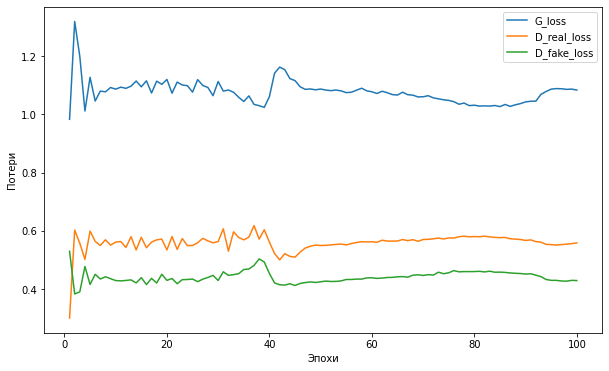

KeyboardInterrupt: ignored

In [64]:
menu()